Perspective Transformation matrix 
 [[ 6.56702057e-01  7.20339663e-02 -7.56401571e+01]
 [-2.06463294e-02  7.38553652e-01  1.00407196e+02]
 [ 4.36009256e-05 -8.39320915e-05  1.00000000e+00]]
변환 전 좌표
 [[[   0.    0.]]

 [[   0. 1009.]]

 [[ 577. 1009.]]

 [[ 577.    0.]]]
변환 후 좌표
 [[[-75.64016   100.407196 ]]

 [[ -3.2315576 923.846    ]]

 [[399.75662   886.466    ]]

 [[295.8344     86.322586 ]]]


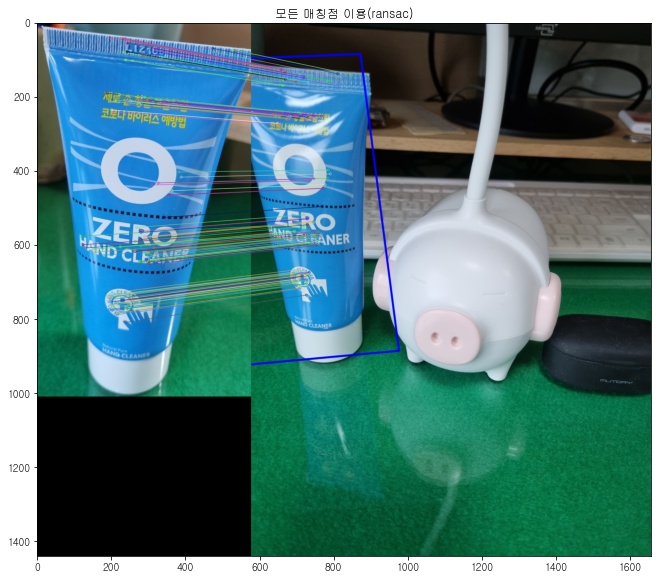

In [17]:
## 모든 매칭점을 이용해서, prosac으로 변환 행렬 만들기

#model 영상의 좌표구하기
src_points = np.float32([keypoints[m.queryIdx].pt for m in matches])

#sample 영상의 좌표구하기
sample_points = np.float32([keypoints2[m.trainIdx].pt for m in matches])

#원근? 변환 행렬 구하기(prosac 이용)
mtrx, mask = cv2.findHomography(src_points,sample_points,
                                cv2.RANSAC,5)
print("Perspective Transformation matrix \n",mtrx)

#4개의 픽셀을 받아서 변환
h,w = img.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
dst = cv2.perspectiveTransform(pts,mtrx)
print('변환 전 좌표\n',pts)
print('변환 후 좌표\n',dst)
#대상영역에 그리기
img2_pro2 = img2.copy()
img2_pro2 = cv2.polylines(img2_pro2,[np.int32(dst)],True,255,3,cv2.LINE_AA)

## 출력된 mask를 씌워서 inlier 찾기.

matchesMask = mask.ravel().tolist()
res5 = cv2.drawMatches(img,keypoints,img2_pro2,keypoints2,matches,None,
                      matchesMask=matchesMask,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res5= cv2.cvtColor(res5, cv2.COLOR_BGR2RGB)#PLOT 출력위해


fig =plt.figure(figsize=(11,11))
plt.subplot(111),plt.title('모든 매칭점 이용(ransac)')
plt.imshow(res5)
plt.show()

Perspective Transformation matrix 
 [[ 7.87120581e-01  3.11721146e-01 -1.42982437e+02]
 [ 1.78657547e-02  1.10236943e+00  5.04888344e+01]
 [ 2.62285088e-04  3.16913211e-04  1.00000000e+00]]
변환 전 좌표
 [[[   0.    0.]]

 [[   0. 1009.]]

 [[ 577. 1009.]]

 [[ 577.    0.]]]
변환 후 좌표
 [[[-142.98244    50.488834]]

 [[ 129.98082   881.0502  ]]

 [[ 425.33554   797.4203  ]]

 [[ 270.28204    52.80582 ]]]


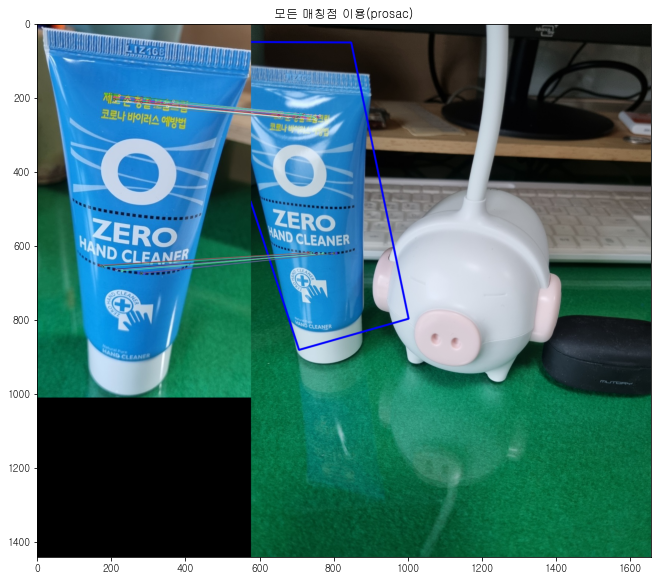

In [22]:
## 모든 매칭점을 이용해서, prosac으로 변환 행렬 만들기

#model 영상의 좌표구하기
src_points = np.float32([keypoints[m.queryIdx].pt for m in matches])

#sample 영상의 좌표구하기
sample_points = np.float32([keypoints2[m.trainIdx].pt for m in matches])

#원근? 변환 행렬 구하기(prosac 이용)
mtrx, mask = cv2.findHomography(src_points,sample_points,
                                cv2.RHO,5)
print("Perspective Transformation matrix \n",mtrx)

#4개의 픽셀을 받아서 변환
h,w = img.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
dst = cv2.perspectiveTransform(pts,mtrx)
print('변환 전 좌표\n',pts)
print('변환 후 좌표\n',dst)
#대상영역에 그리기
img2_pro3 = img2.copy()
img2_pro3 = cv2.polylines(img2_pro3,[np.int32(dst)],True,255,3,cv2.LINE_AA)

## 출력된 mask를 씌워서 inlier 찾기.

matchesMask = mask.ravel().tolist()
res6 = cv2.drawMatches(img,keypoints,img2_pro3,keypoints2,matches,None,
                      matchesMask=matchesMask,
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res6= cv2.cvtColor(res6, cv2.COLOR_BGR2RGB)#PLOT 출력위해


fig =plt.figure(figsize=(11,11))
plt.subplot(111),plt.title('모든 매칭점 이용(prosac)')
plt.imshow(res6)
plt.show()

Perspective Transformation matrix 
 [[-4.96807912e-02 -3.11497105e-01  2.19562485e+02]
 [-1.31780763e-01 -8.83883628e-01  6.20968601e+02]
 [-2.12621513e-04 -1.42326040e-03  1.00000000e+00]]
변환 전 좌표
 [[[   0.    0.]]

 [[   0. 1009.]]

 [[ 577. 1009.]]

 [[ 577.    0.]]]
변환 후 좌표
 [[[219.56248 620.9686 ]]

 [[217.25446 621.16205]]

 [[220.85619 620.8609 ]]

 [[217.59134 621.13336]]]


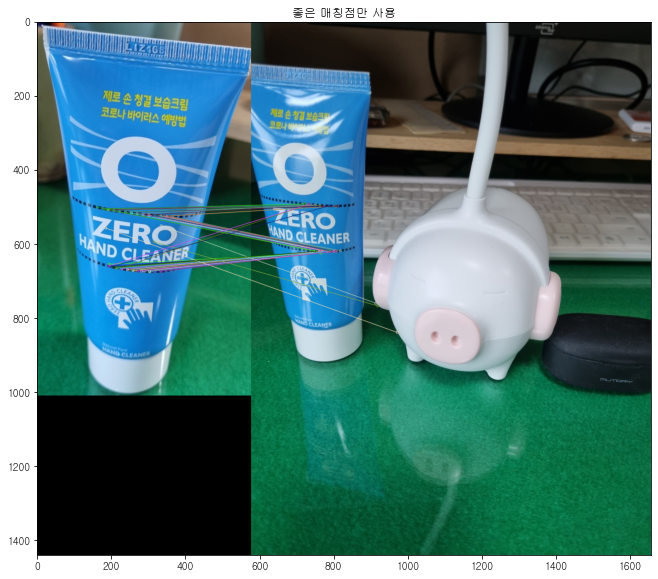

In [6]:
### prosac

# 좋은 매칭점들만 활용해서, 변환 행렬 만들기


#model 영상의 좌표구하기
src_points = np.float32([keypoints[m.queryIdx].pt for m in good_matches])

#sample 영상의 좌표구하기
sample_points = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

#원근? 변환 행렬 구하기(prosac 이용)
mtrx, mask = cv2.findHomography(src_points,sample_points,cv2.RANSAC,5)
print("Perspective Transformation matrix \n",mtrx)

#4개의 픽셀을 받아서 변환
h,w = img.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
dst = cv2.perspectiveTransform(pts,mtrx)
print('변환 전 좌표\n',pts)
print('변환 후 좌표\n',dst)
#대상영역에 그리기
img2_pro1=img2.copy()
img2_pro1= cv2.polylines(img2_pro1,[np.int32(dst)],True,255,3,cv2.LINE_AA)

## 출력된 mask를 씌워서 inlier 찾기.



res4 = cv2.drawMatches(img, keypoints, img2_pro1, keypoints2, good_matches, None,
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
res4= cv2.cvtColor(res4, cv2.COLOR_BGR2RGB)#PLOT 출력위해

fig =plt.figure(figsize=(11,11))
plt.subplot(111), plt.title('좋은 매칭점만 사용')
plt.imshow(res4)
plt.show()